      Month  Sales Product Category  Profit
0   January    150                A      50
1  February    200                A      80
2     March    180                B      60
3     April    250                A     100
4       May    220                B      90


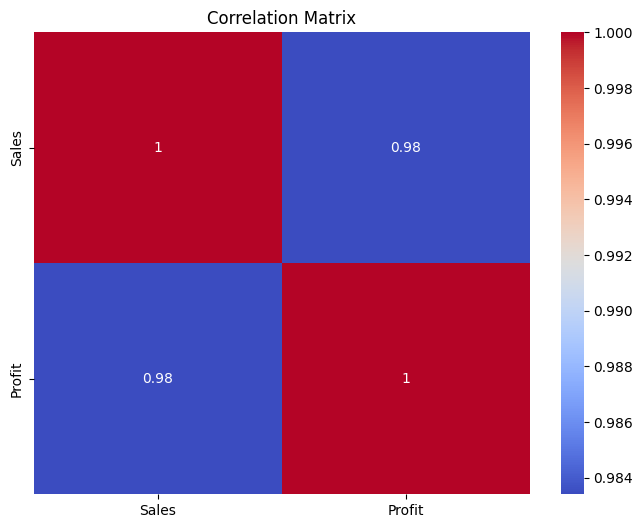

      Month  Sales  Profit  Product Category_A  Product Category_B  \
0   January    150      50                True               False   
1  February    200      80                True               False   
2     March    180      60               False                True   
3     April    250     100                True               False   
4       May    220      90               False                True   

   Product Category_C  
0               False  
1               False  
2               False  
3               False  
4               False  
      Month  Profit  Product Category_A  Product Category_B  \
0   January      50                True               False   
1  February      80                True               False   
2     March      60               False                True   
3     April     100                True               False   
4       May      90               False                True   

   Product Category_C  
0               False  
1       

ValueError: could not convert string to float: 'September'

In [ ]:
import pandas as pd

# قراءة البيانات
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Sales': [150, 200, 180, 250, 220, 210, 190, 230, 210, 240, 280, 300],
    'Product Category': ['A', 'A', 'B', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
    'Profit': [50, 80, 60, 100, 90, 85, 75, 95, 80, 110, 130, 150]
}

df = pd.DataFrame(data)

# استعراض البيانات
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

# حساب الارتباط بين المبيعات والأرباح
# إزالة الأعمدة غير الرقمية قبل حساب الارتباط
correlation = df.drop(['Month', 'Product Category'], axis=1).corr()


# عرض خريطة الارتباط
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# تحويل فئة المنتجات ل One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Product Category'])

# استعراض البيانات بعد التحويل
print(df_encoded.head())

# الميزات (X) هي الأرباح وفئة المنتجات
X = df_encoded.drop('Sales', axis=1)

# المتغير المستهدف (y) هو المبيعات
y = df_encoded['Sales']

# استعراض الميزات والمتغير المستهدف
print(X.head())
print(y.head())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# تحويل عمود الأشهر لأرقام
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])

# عرض البيانات بعد تحويل الأشهر
print(df.head())


# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بناء موديل الانحدار الخطي
model = LinearRegression()

# تدريب الموديل
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الخطأ المتوسط
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')